![](penguins.png)

![](culmen.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("penguins_size.csv")

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<h1 style = 'color:Green'>The dataset consists of 7 columns.</h1>

**species:** penguin species (Chinstrap, Adélie, or Gentoo)<br>
**culmen_length_mm:** culmen length (mm)<br>
**culmen_depth_mm:** culmen depth (mm)<br>
**flipper_length_mm:** flipper length (mm)<br>
**body_mass_g:** body mass (g)<br>
**island:** island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)<br>
**sex:** penguin sex

In [5]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [7]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [8]:
df["sex"].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [9]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer

mode_imputer = SimpleImputer(strategy="most_frequent")

In [11]:
df["sex"]=pd.DataFrame(mode_imputer.fit_transform(df[["sex"]]))

df["sex"].isnull().sum()

0

In [12]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [13]:
df = df.dropna()

In [14]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

---

<h1 style = "color:Red"> Overall Observations</h1>

**species:**  Chinstrap, Adélie, Gentoo<br></br>
**culmen_length_mm:** Min - 32.1 ----  Max - 59.6 in mm<br></br>
**culmen_depth_mm:**  Min - 13.1 ----  Max - 21.5 in mm<br></br>
**flipper_length_mm:** Min - 172 ----  Max - 231 in mm<br></br>
**body_mass_g:**   Min - 2700  ----  Max - 6300  in g<br></br>
**island:** Dream, Torgersen, Biscoe<br></br>
**sex:** penguin sex

---

---

---

---

<h1 style = "color:Red">EDA</h1>

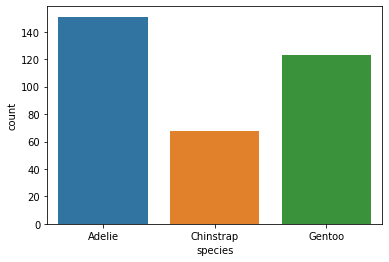

Adelie       151
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

In [15]:
sns.countplot(x='species', data=df);
plt.show()
df.species.value_counts()

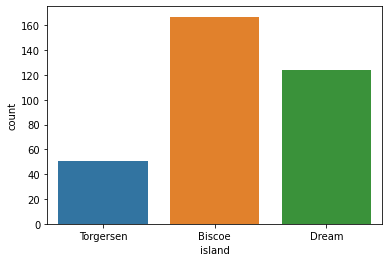

Biscoe       167
Dream        124
Torgersen     51
Name: island, dtype: int64

In [16]:
sns.countplot(x='island', data=df);
plt.show()
df.island.value_counts()

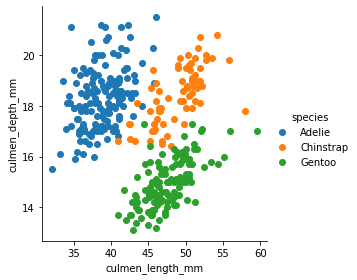

In [17]:
sns.FacetGrid(df, hue="species", size=4) \
   .map(plt.scatter, "culmen_length_mm", "culmen_depth_mm") \
   .add_legend()

### If culmen_depth is above 16 mm and culmen depth is below 40 mm it is mostly "Adelie"
### If culmen_depth is above 16 mm and culmen depth is above 40 mm it is mostly "Chinstrap"
### If culmen_depth is below 16 mm and culmen depth is above 40 mm it is mostly "Gento"

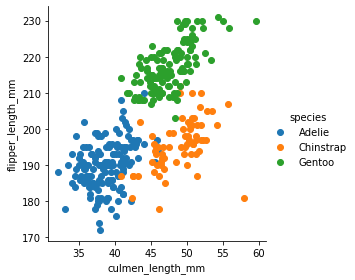

In [18]:
sns.FacetGrid(df, hue="species", size=4) \
   .map(plt.scatter, "culmen_length_mm", "flipper_length_mm") \
   .add_legend()

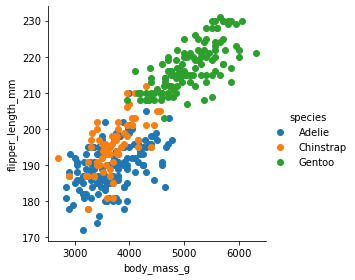

In [19]:
sns.FacetGrid(df, hue="species", size=4) \
   .map(plt.scatter, "body_mass_g", "flipper_length_mm") \
   .add_legend()

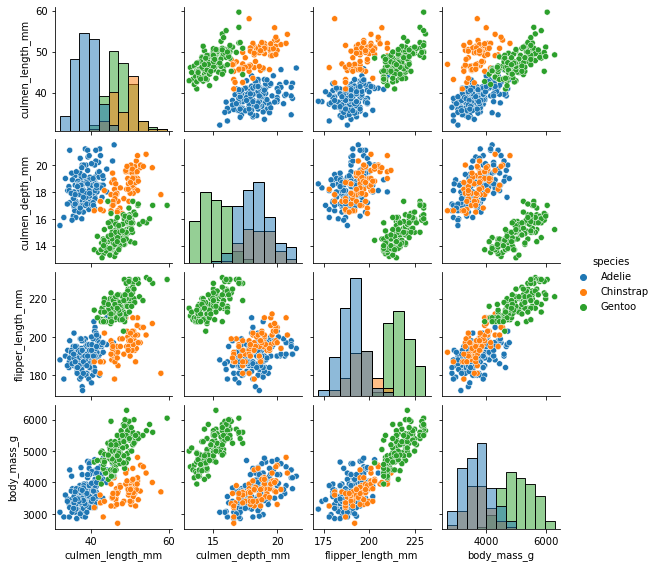

In [20]:
sns.pairplot(df, hue="species", size=2,diag_kind="hist")

<h2 style = "color : Blue"> Converting Categorical data to Numerical data</h2>

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['island'] = le.fit_transform(df['island'])

In [23]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,2
1,Adelie,2,39.5,17.4,186.0,3800.0,1
2,Adelie,2,40.3,18.0,195.0,3250.0,1
4,Adelie,2,36.7,19.3,193.0,3450.0,1
5,Adelie,2,39.3,20.6,190.0,3650.0,2


# X & y

In [24]:
X = df.drop(columns = ['species'], axis=1)
y = df.species

In [25]:
X

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,2
1,2,39.5,17.4,186.0,3800.0,1
2,2,40.3,18.0,195.0,3250.0,1
4,2,36.7,19.3,193.0,3450.0,1
5,2,39.3,20.6,190.0,3650.0,2
...,...,...,...,...,...,...
338,0,47.2,13.7,214.0,4925.0,1
340,0,46.8,14.3,215.0,4850.0,1
341,0,50.4,15.7,222.0,5750.0,2
342,0,45.2,14.8,212.0,5200.0,1


In [26]:
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 342, dtype: object

# Train & Test Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 32)

# Applying ML Algorithm

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
model = DecisionTreeClassifier()

In [31]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
model.score(X_train,y_train)

1.0

In [33]:
model.score(X_test,y_test)

0.9514563106796117

In [34]:
pre = model.predict(X_test)

In [35]:
pre

array(['Adelie', 'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Chinstrap',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Adelie', 'Adelie

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

      Adelie       0.95      0.93      0.94        42
   Chinstrap       0.85      0.94      0.89        18
      Gentoo       1.00      0.98      0.99        43

    accuracy                           0.95       103
   macro avg       0.93      0.95      0.94       103
weighted avg       0.95      0.95      0.95       103



In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
RF = RandomForestClassifier()

In [39]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
RF.score(X_train,y_train)

1.0

In [41]:
RF.score(X_test,y_test)

0.970873786407767

# Manually Checking

In [42]:
new = [2,39.1,18.7,181.0,3750.0,2]

In [43]:
model.predict([new])

array(['Adelie'], dtype=object)

In [44]:
from sklearn.svm import SVC

In [45]:
SVC = SVC()

In [46]:
SVC.fit(X_train,y_train)

SVC()

In [47]:
SVC.score(X_train,y_train)

0.7071129707112971

In [48]:
SVC.score(X_test,y_test)

0.7766990291262136